In [1]:
import glob
import re
import pandas as pd
from yattag import Doc
import unicodedata
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
from collections import Counter

In [2]:
def pie_plots(df, dim1, dim2):
    _, ax = plt.subplots(dim1, dim2, figsize=(15,15))

    i = 0
    print(df.columns)
    df_aux = pd.DataFrame()
    dict_aux = {}
    for id in df.columns:
        total = len(df)
        aparicoes = df[id].count()
        labels = ["Com " + str(id), "Sem " + str(id)]
        size = [aparicoes, total - aparicoes]
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90,  explode=[0.05, 0.05])
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
        ax[math.floor(i/2), i%2].axis('off')
        i+=1

    plt.show()

In [3]:
doc, tag, text = Doc().tagtext()

In [4]:
txt_files = glob.glob('../data/**/**/*.txt')

# ATOS LICITAÇÃO

- AVISO DE ABERTURA DE LICITACAO
- AVISO(S) DE HOMOLOGACAO E ADJUDICACAO
- AVISO DE ADJUDICACAO E HOMOLOGACAO
- RESULTADOS D(EO) JULGAMENTO
- AVISO D(EO) RESULTADO DE JULGAMENTO
- AVISO DE DECLARACAO DE VENCEDOR


In [5]:
all_contracts = []
for txt in txt_files:
    instances = re.findall('''(?:AVISO(?:S)?\s+D[EO]\s+ABERTURA\s+D[EO]\s+LICITACAO|AVISO(?:S)?\s+D[EO]\s+ADJUDICACAO\s+E\s+HOMOLOGACAO|AVISO(?:S)?\s+D[EO]\s+HOMOLOGACAO\s+E\s+ADJUDICACAO|RESULTADO(?:S)?\s+D[EO]\s+JULGAMENTO|AVISO\s+D[EO]\s+RESULTADO\s+D[EO]\s+JULGAMENTO|AVISO\s+D[EO]\s+DECLARACAO\s+D[EO]\s+VENCEDOR|AVISO(?:S)?\s+D[EO]\s+REVOGACAO\s+D[EO]\s+LICITACAO|AVISO(?:S)?\s+D[EO]\s+REABERTURA\s+D[EO]\s+LICITACAO)(?:[\s\S]+?
)(?:[A-ZÁÃÂÓÍÔÎÊÉÕ]+\s.+?(?:[A-Z]{3,})(?:(?:"|\n(?!(?:S|DE)\s+MEDICAMENTOS|\d|INTERESSADO|. |A Comissao|formado|EIRELI -|BRASILEIRO S/A|AGENCIA|COMPANHIA IMOBILIARIA|EXTERIOR|EIRELI no|AUDITORES|HEMOCARE|HOSPITALARES|HOSPITALAR|GERAL|COMERCIAL|EXTRATO|CIRURGICOS|BARRETO COMERCIAL|CONSULTORES|LTDA|NUMERADOS|FARMACEUTICOS|FARMACEUTICA|DE PRODUTOS|PRODUTOS|CONCORRENCIA|FEDERAL|INDUSTRIA|PROCESSO|COMERCIO|COM TRATAMENTO FAVORECIDO E DIFERENCIADO A ME E EPP\nPROCESSO SEI-GDF|Repeticao dos itens fracassados))))''',
                            unicodedata.normalize('NFKD', open(txt, encoding='utf-8').read()))
    all_contracts.extend(instances)

In [20]:
regex_dict = {
    'ato': '(AVISO(?:S)?\s+D[EO]\s+ABERTURA\s+D[EO]\s+LICITACAO|AVISO(?:S)?\s+D[EO]\s+ADJUDICACAO\s+E\s+HOMOLOGACAO|AVISO(?:S)?\s+D[EO]\s+HOMOLOGACAO\s+E\s+ADJUDICACAO|RESULTADO(?:S)?\s+D[EO]\s+JULGAMENTO|AVISO\s+D[EO]\s+RESULTADO\s+D[EO]\s+JULGAMENTO|AVISO\s+D[EO]\s+DECLARACAO\s+D[EO]\s+VENCEDOR|AVISO(?:S)?\s+D[EO]\s+REVOGACAO\s+D[EO]\s+LICITACAO|AVISO(?:S)?\s+D[EO]\s+REABERTURA\s+D[EO]\s+LICITACAO)',
    'processo': '(?:(?:(?:P|p)rocesso(?:\s+)?(?:(?:\()?SEI(?:\)?))?(?:\s+)?(?:(?:no|n\.o)?)?)|(?:P|p)rocesso:|(?:P|p)rocesso|Processo.|(?:P|p)rocesso\s+no|(?:P|p)rocesso\s+no.|(?:P|p)rocesso\s+no:|(?:P|p)rocesso\s+SEI\s+no:|(?:P|p)rocesso\s+SEI:|(?:P|p)rocesso\s+SEI\s+no|(?:P|p)rocesso SEI|(?:P|p)rocesso\s+SEI\s+no.|(?:P|p)rocesso\s+SEI\.|PROCESSO:|PROCESSO|PROCESSO.|PROCESSO\s+no|PROCESSO\s+no.|PROCESSO\s+no:|PROCESSO\s+SEI\s+no:|PROCESSO\s+SEI:|PROCESSO\s+SEI|PROCESSO\s+SEI\s+no|PROCESSO\s+SEI\s+no.|PROCESSO\s+SEI.)((?:(?!\s\d{2}.\d{3}.\d{3}/\d{4}-\d{2}))(?:(?:\s)(?:(?:[\d.]+)|(?:[\d\s]+))[.-]?(?:(?:\d)|(?:[.\d\sSEI-]+))(?:/|-|\b)(?:(?:(?:\d)+|(?:[\d\s]+)))?(?:-(?:(?:\d)+|(?:[\d\s]+)))?(?:-SECOM/DF|/CBMDF|F J Z B / D F)?))',
    'data': 'Bras[[ií]lia(?:\/?DF)?,?\s+(\d{2}\s+de+\s\w+\s+de\s+\d{4})',
}

df_dict = {
    'ato': [],
    'processo': [],
    'data': [],
    'texto': [],
}

In [21]:
for contract in all_contracts:
    df_dict['texto'].append(contract)
    for field in regex_dict:
        match = re.search(regex_dict[field], contract)
        if match:
            res = tuple(x for x in match.groups() if x is not None)
            df_dict[field].append(res[0])
        else:
            df_dict[field].append(np.nan)

df = pd.DataFrame.from_dict(df_dict)
df.to_csv('timeLine/atosLicitacao_regex.csv')

In [22]:
dados_atosLicitacao = pd.read_csv('timeLine/atosLicitacao_regex.csv')
dados_atosLicitacao = dados_atosLicitacao.drop(["Unnamed: 0"], axis=1)

In [23]:
print(len(dados_atosLicitacao))
print(dados_atosLicitacao.isnull().sum())

3953
ato            0
processo    1069
data        1995
texto          0
dtype: int64


In [24]:
dados_atosLicitacao

,ato,processo,data,texto
0,RESULTADO DE JULGAMENTO,137.000.347/2012,NaN,RESULTADO DE JULGAMENTO\nLICITACAO TOMADA DE P...
1,AVISO DE HOMOLOGACAO E ADJUDICACAO,053.002.070/2012/CBMDF,28 de dezembro de 2012,AVISO DE HOMOLOGACAO E ADJUDICACAO DE LICITACA...
2,RESULTADO DE JULGAMENTO,NaN,NaN,RESULTADO DE JULGAMENTO PARCIAL\nPREGAO ELETRO...
3,RESULTADOS DE JULGAMENTO,\n417.001.052/2012,03 de janeiro de 2013,RESULTADOS DE JULGAMENTO\nPREGAO ELETRONICO No...
4,RESULTADO DE JULGAMENTO,NaN,NaN,RESULTADO DE JULGAMENTO\nPREGAO PRESENCIAL No ...
...,...,...,...,...
3948,AVISO DE RESULTADO DE JULGAMENTO,00063-00002824/2019-34,19 de junho de 2020,AVISO DE RESULTADO DE JULGAMENTO DO PREGAO ELE...
3949,AVISO DE RESULTADO DE JULGAMENTO,00391-00007908/2018-99,23 de junho de 2020,AVISO DE RESULTADO DE JULGAMENTO PREGAO ELETRO...
3950,RESULTADO DE JULGAMENTO,NaN,NaN,RESULTADO DE JULGAMENTO PREGAO ELETRONICO POR ...
3951,AVISO DE ADJUDICACAO E HOMOLOGACAO,00050-00035339/2019-69,24 de junho de 2020,AVISO DE ADJUDICACAO E HOMOLOGACAO PREGAO ELET...


In [11]:
dados_atosLicitacao['ato'].unique()

array(['RESULTADO DE JULGAMENTO', 'AVISO DE HOMOLOGACAO E ADJUDICACAO',
       'RESULTADOS DE JULGAMENTO', 'AVISO DO RESULTADO DE JULGAMENTO',
       'AVISO DE ABERTURA DE LICITACAO',
       'AVISO DE ADJUDICACAO E HOMOLOGACAO',
       'AVISO DE REVOGACAO DE LICITACAO',
       'AVISO DE RESULTADO DE JULGAMENTO',
       'AVISOS DE ADJUDICACAO E HOMOLOGACAO', 'RESULTADO DO \nJULGAMENTO',
       'AVISOS DE ABERTURA DE LICITACAO', 'RESULTADO DO JULGAMENTO',
       'AVISO DE REABERTURA DE LICITACAO',
       'AVISO DO RESULTADO DO JULGAMENTO',
       'AVISO DE RESULTADO DO JULGAMENTO',
       'AVISOS DE HOMOLOGACAO E ADJUDICACAO',
       'AVISOS DE REVOGACAO DE LICITACAO',
       'AVISOS DE REABERTURA DE LICITACAO',
       'AVISO DE DECLARACAO DO VENCEDOR',
       'AVISO DE DECLARACAO DE VENCEDOR'], dtype=object)

In [12]:
# Retirar o espaço inicial dos processos e os \n, mas está demorando muito


# dados_atosLicitacao['processo'] = dados_atosLicitacao['processo'].astype(str)
for idx in range(len(dados_atosLicitacao)):
    if not pd.isna(dados_atosLicitacao['processo'][idx]):
        if dados_atosLicitacao['processo'][idx].count('\n') > 0:
            dados_atosLicitacao[idx] = dados_atosLicitacao['processo'][idx].replace('\n', '')
        # dados_atosLicitacao['processo'][idx] = dados_atosLicitacao['processo'][idx].replace(dados_atosLicitacao['processo'][idx][0], '')

# if not pd.isna(dados_atosLicitacao['processo'][8]):
#     print('true')
# else:
#     print('false')

In [13]:
linha_por_processo = Counter(dados_atosLicitacao['processo'])

In [14]:
print(linha_por_processo)

Counter({nan: 1069, ' 00050-00151539/2017-04': 7, ' 063.000.065/2016': 6, ' 0050-001024/2017': 6, ' 00050-00020438/2018-65': 6, ' 050.000.174/2012': 4, ' 050.000.399/2015': 4, ' 00053-SEI-042842/2015/CBMDF': 4, ' 050.000.563/2016': 4, ' 050.000.093/2016': 4, ' 063.000.261/2016': 4, ' 0050-001259/2017': 4, ' 00050-00027382/2018-70': 4, ' 001-000361/2019': 4, ' 00050-00028014/2019-20': 4, ' 054.001.553/2012- ': 3, ' 090.000.455/2010': 3, ' 080.008319/2012': 3, ' 050.000.502/2013': 3, ' 063.000.096/2015': 3, ' 050.000.139/2016': 3, ' 20206/2015': 3, ' 054.002.078/2015': 3, ' 050.000.325/2016': 3, ' 054.001.637/2013': 3, ' 097.000.420/2017': 3, ' 097.000.037/2017': 3, ' 050.000.595/2017': 3, ' 054.002.582/2017': 3, ' 001-000.394/2018': 3, ' 001-000813/2018': 3, ' 00197-00000863/2019-36': 3, ' 001-000839/2018': 3, ' 00113-00001386/2019-27': 3, ' 00050-00060409/2018-36': 3, ' 001-001.053/2019': 3, ' 00072-00001421/2019-69': 3, ' 001-001438/2019': 3, ' 00050-00035446/2019-97': 3, ' 411.000.07

In [15]:
dados_atosLicitacao[['ato','processo','data','texto']].loc[dados_atosLicitacao['processo'] == ' 00050-00151539/2017-04']

,ato,processo,data,texto
2685,AVISO DE ABERTURA DE LICITACAO,00050-00151539/2017-04,10 de julho de 2018,AVISO DE ABERTURA DE LICITACAO - SRP\nPREGAO E...
2806,AVISO DE ADJUDICACAO E HOMOLOGACAO,00050-00151539/2017-04,30 de agosto de 2018,AVISO DE ADJUDICACAO E HOMOLOGACAO\nPREGAO ELE...
2895,AVISO DE ADJUDICACAO E HOMOLOGACAO,00050-00151539/2017-04,02 de outubro de 2018,AVISO DE ADJUDICACAO E HOMOLOGACAO\nPREGAO ELE...
3091,AVISO DE ABERTURA DE LICITACAO,00050-00151539/2017-04,07 de dezembro de 2018,AVISO DE ABERTURA DE LICITACAO -SRP\nPREGAO EL...
3124,AVISO DE ADJUDICACAO E HOMOLOGACAO,00050-00151539/2017-04,21 de dezembro de 2018,AVISO DE ADJUDICACAO E HOMOLOGACAO\nPREGAO ELE...
3163,AVISO DE ABERTURA DE LICITACAO,00050-00151539/2017-04,23 de janeiro de 2019,AVISO DE ABERTURA DE LICITACAO\nPREGAO ELETRON...
3184,AVISO DE ADJUDICACAO E HOMOLOGACAO,00050-00151539/2017-04,NaN,AVISO DE ADJUDICACAO E HOMOLOGACAO\nPREGAO ELE...


In [16]:
# lista = []

# for idx in range(len(dados_atosLicitacao)):
#     if pd.isna(dados_atosLicitacao['processo'][idx]):
#         lista.append(idx)

In [17]:
# 0050.000.473/2016-SSP
#  053.002.480/2012/CBMDF
# 111.001.637/2012\nModalidade/numero

In [18]:
# tmp = []
# for txt in txt_files:
#     instances = re.findall('''(EXTRATO DE CONTRATO\nContrato no 36/2012  TCB/PETROBRAS DISTRIBUIDORA S.A.; CNPJ: 34.274.233/0001-\n02[\s\S]*?)\.\n''',
#                             unicodedata.normalize('NFKD', open(txt, encoding='utf-8').read()))
#     tmp.extend(instances)

# tmp

## Porcentagem de dados faltantes

Index(['ato', 'processo', 'data', 'texto'], dtype='object')


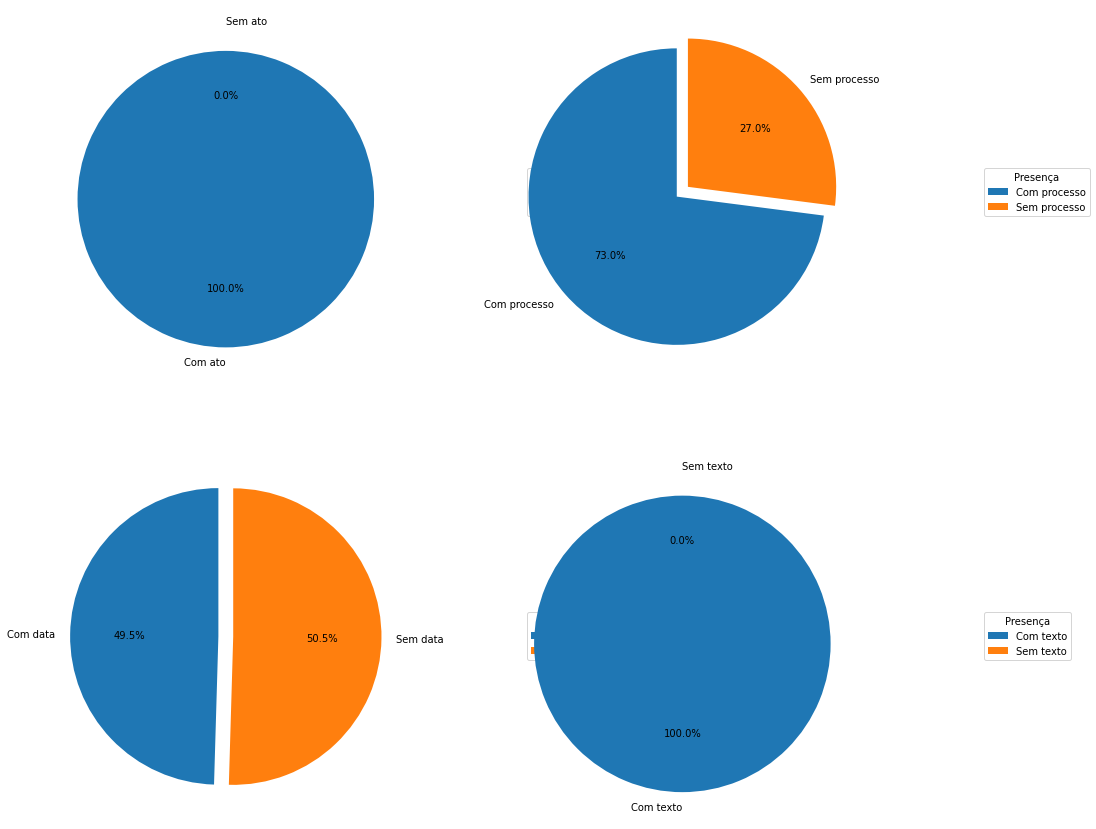

In [25]:
pie_plots(dados_atosLicitacao, 2, 2)